# R - Squared

In data science, we create and use regression models of the process of estimating a variable (the dependent variable) using one or more variables. So, how will we understand the performance of the regression model we have created? <br>
One of the metrics used to measure regression performance is <b> R - squared</b>.
<br>
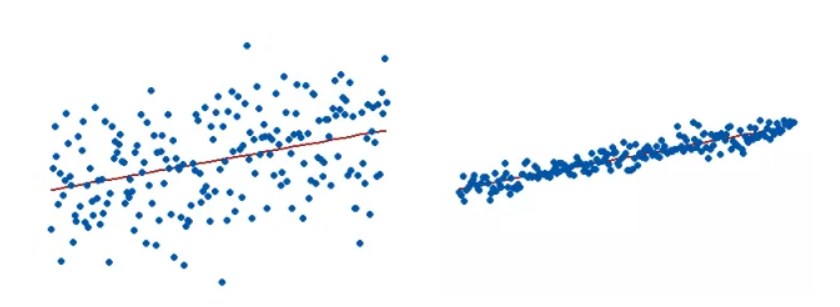

## What is R-Squared?
Let's go through an example to explain what R-squared is. We have a data. We have given this data to a regression model by making the necessary preprocessing applications. Then a regression line was formed. So is this regression line appropriate? Or how good is this regression line, could it be better? R-squared is a metric that allows us to get answers to such questions. It is a metric that shows us how well the regression lin;e formed, with a numerical value in an appropriate position.

## How to calculate R-Squared?
R-squared is obtained by dividing the sum of the squares of the distance of each point from the regression line by the sum of the squares of the distance of each point from the mean and subtracting the result from 1. <br>
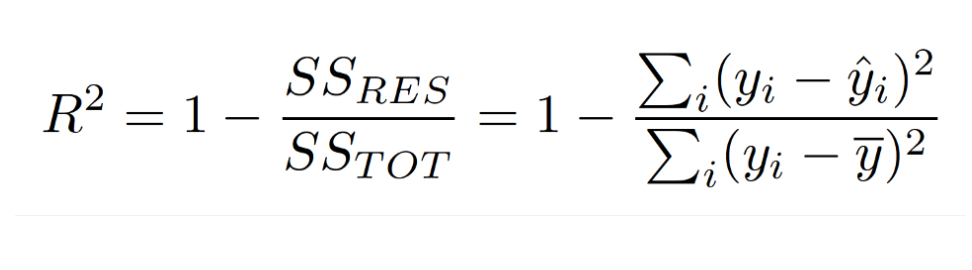
<br>
There are some exceptions when interpreting the R-square metric. For example, logically, if R-Squared is low, we think that the fit of the model is bad, and if it is high, we think that the fit of the model is good. But this is not always the case. In some data this situation varies. Therefore, it is not correct to evaluate the performance of the model only with the R-Squared metric.
<br>
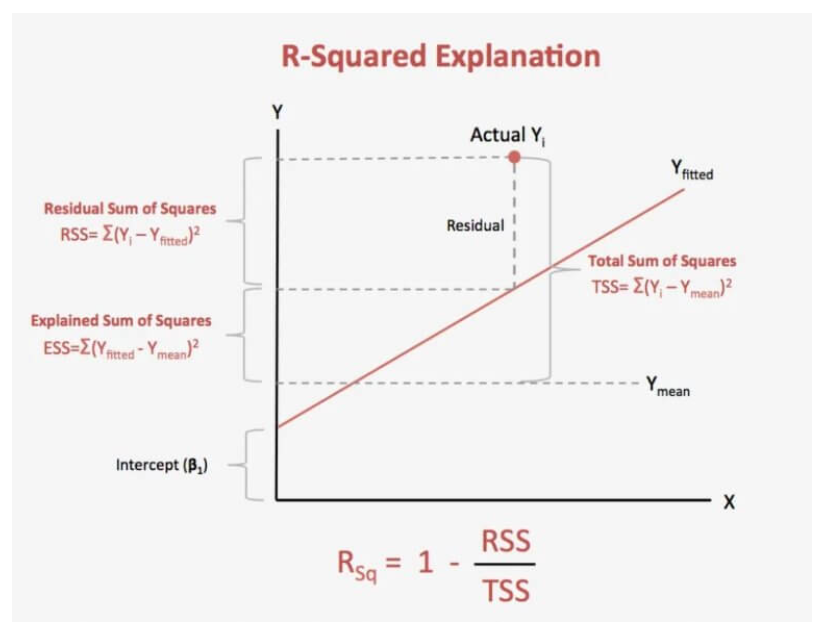


<br>


## Adjusted R-Squared
As the number of independent values increases, indirectly the R-Squared metric will also increase. For example, let's say we're calculating the R-Squared of a house estimate. Next, let's add an attribute called average height of previous homeowners to this home estimate data. This attribute has nothing to do with house prices, but R-Squared will be higher. In other words, it will be deduced that the prices of the houses with a high average height of the old house owners are higher. This approach is wrong. We use the <b>Adjusted R-squared metric <b> to improve this situation as much as possible. This metric's expected value the number of individual elements.
<br>
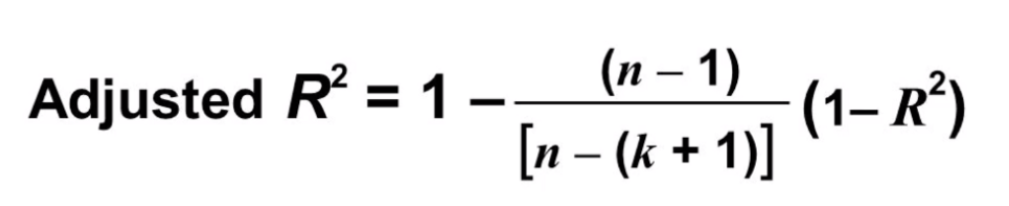
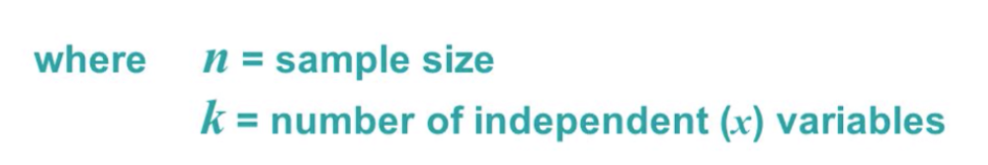


#### Let's examine R-Squared and Adjusted R-Squared metrics by applying

Firstly, we are importing libarires and methods that we use

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split

In [2]:
house_data = pd.read_csv("../../House_Rent_Dataset.csv")
df = house_data.copy()
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


Let's take a quick look at the data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


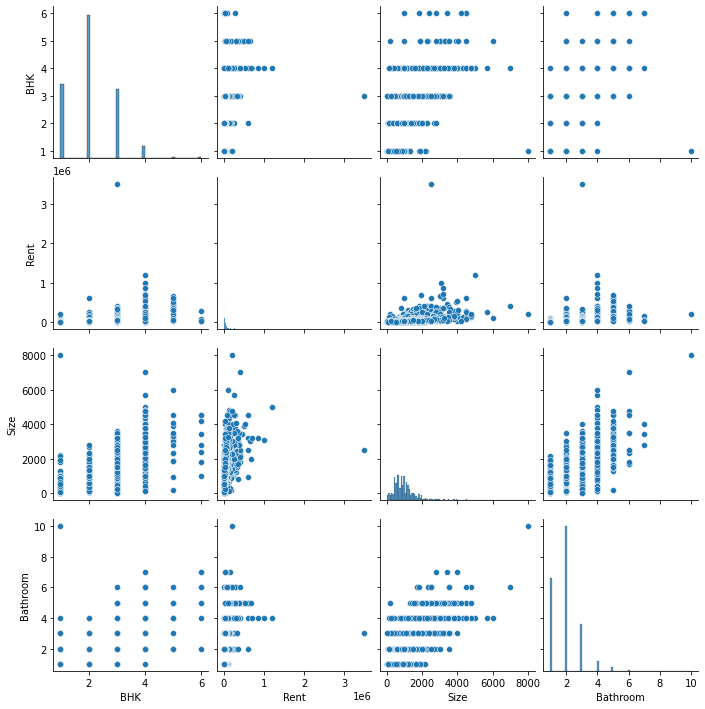

In [4]:
sns.pairplot(df);

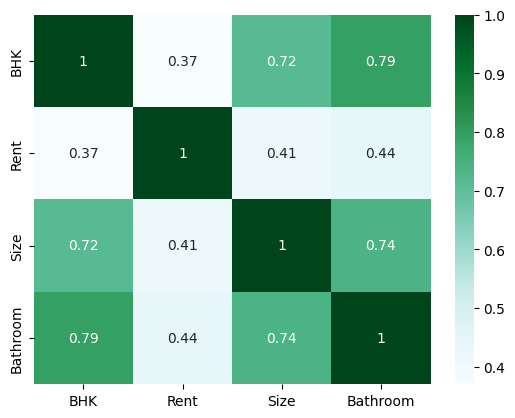

In [5]:
sns.heatmap(df.corr(), cmap = 'BuGn', annot = True);

We delete "Posted On" feature for it is not necessary for regression model. 

In [6]:
df.drop("Posted On", axis = 1, inplace = True)

### Preprocessing Part

In [7]:
# We define a categoric features that will perform one hot encoding process
ENCODE_CAT_FEATURES = ["Floor", "Area Type", "Area Locality", "City", "Furnishing Status",
               "Tenant Preferred","Point of Contact"]

# we not get "Rent" feature. Because it's independent feature
NUM_AND_ENCODED_FEATURES = ["Size","BHK","Bathroom"]

# Label Encoding process and standard Scaler
ordinal_encoders = dict()
standard_scalers = dict()
for cat_feature in ENCODE_CAT_FEATURES:
    ordinal_encoders[cat_feature] = OrdinalEncoder()
    standard_scalers[cat_feature] = StandardScaler()
    df[cat_feature] = label_encoders[cat_feature].fit_transform(np.reshape(df[cat_feature].values,(-1,1)))
    
# Standard scaling process for numeric and encoded features
for num_encoded_feature in NUM_AND_ENCODED_FEATURES:
    standard_scalers[num_encoded_feature] = StandardScaler()
    df[num_encoded_feature] = \
    standard_scalers[num_encoded_feature].fit_transform(np.reshape(df[num_encoded_feature].values,(-1,1)))
    

### Model Split Part

In [8]:
X = df.drop("Rent", axis = 1)
y = df["Rent"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [9]:
print("x train shape:", np.shape(x_train))
print("x test shape:", np.shape(x_test))
print("y train shape:", np.shape(y_train))
print("y test shape:", np.shape(y_test))

x train shape: (3796, 10)
x test shape: (950, 10)
y train shape: (3796,)
y test shape: (950,)


### Regression Part

In [10]:
def calculate_adjusted_r2(R2, n, k):
    return  1- ((1-R2) * (n-1)/(n-k-1)) 

In [11]:
r2_scores=[]
adjusted_r2 = []
feature_names=[]
for i in range(1, 10):   
    reduce_dim_pipe = Pipeline(steps=[
        ('reduce_dim', SelectKBest(k=i, score_func=f_regression)),       
    ])
    
    fit_pipe = Pipeline(steps=[
        ('reduce_dim_pipe', reduce_dim_pipe),       
        ('regression', LinearRegression())
    ])
    
    # Calculate R-Squared
    R2 = cross_val_score(fit_pipe, X=x_train, y=y_train, cv=10, scoring='r2').mean()    
    r2_scores.append(R2)
    print("R2 is calculated:", R2)
    
    # Calculate Adjusted R-Squared
    n, k= x_train.shape
    adj_R2 = calculate_adjusted_r2(R2, n, k)
    adjusted_r2.append(adj_R2)
    print("Adjusted R-Squared is calculated:",adj_R2)
    
    # Performing training to select the best features
    reduce_dim_pipe.fit(X=x_train, y=y_train)  
    # Select best features
    cols = reduce_dim_pipe.named_steps['reduce_dim'].get_support(indices=True)
    
    # Create a new dataframe for getting best feature(s)
    features_df_new = x_train.iloc[:, cols]
    best_features = list(features_df_new.columns)
    print("Best Features:", best_features)
    feature_names.append(best_features)
    print("-"*60)

R2 is calculated: 0.28397691595706065
Adjusted R-Squared is calculated: 0.2820851772938032
Best Features: ['Bathroom']
------------------------------------------------------------
R2 is calculated: 0.2918406787410629
Adjusted R-Squared is calculated: 0.2899697162014092
Best Features: ['Size', 'Bathroom']
------------------------------------------------------------
R2 is calculated: 0.2910495776536782
Adjusted R-Squared is calculated: 0.2891765250186813
Best Features: ['BHK', 'Size', 'Bathroom']
------------------------------------------------------------
R2 is calculated: 0.35974587288825427
Adjusted R-Squared is calculated: 0.3580543164097556
Best Features: ['BHK', 'Size', 'Bathroom', 'Point of Contact']
------------------------------------------------------------
R2 is calculated: 0.361252265241162
Adjusted R-Squared is calculated: 0.35956468866319946
Best Features: ['BHK', 'Size', 'Area Type', 'Bathroom', 'Point of Contact']
----------------------------------------------------------

In [12]:
scoring_df = pd.DataFrame(np.column_stack((r2_scores, adjusted_r2)), columns=['R2', 'Adj_R2'])
scoring_df['feature_names'] = feature_names
scoring_df['features'] = range(1, 10)
scoring_df

,R2,Adj_R2,feature_names,features
0,0.283977,0.282085,[Bathroom],1
1,0.291841,0.289970,"[Size, Bathroom]",2
2,0.291050,0.289177,"[BHK, Size, Bathroom]",3
3,0.359746,0.358054,"[BHK, Size, Bathroom, Point of Contact]",4
4,0.361252,0.359565,"[BHK, Size, Area Type, Bathroom, Point of Cont...",5
5,0.391949,0.390342,"[BHK, Size, Area Type, City, Bathroom, Point o...",6
6,0.394926,0.393328,"[BHK, Size, Area Type, City, Furnishing Status...",7
7,0.394600,0.393001,"[BHK, Size, Floor, Area Type, City, Furnishing...",8
8,0.394647,0.393047,"[BHK, Size, Floor, Area Type, Area Locality, C...",9


### Visualization of R-Squared And Adjusted R-Squared Values

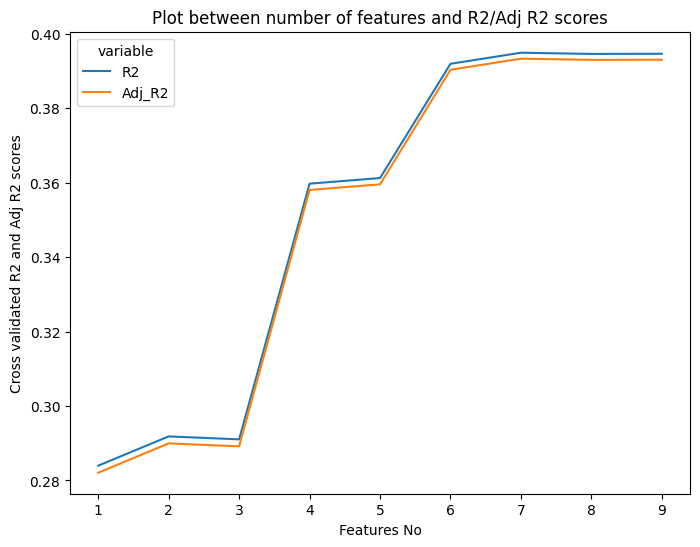

In [13]:
fig, ax = plt.subplots(figsize=(8, 6))
long_format_df = pd.melt(scoring_df.loc[:, ['features','R2', 'Adj_R2']], ['features'])
sns.lineplot(x='features', y='value', hue='variable', data=long_format_df, ax=ax)
ax.set_xlabel('Features No')
ax.set_ylabel('Cross validated R2 and Adj R2 scores')
ax.set_title('Plot between number of features and R2/Adj R2 scores')
plt.show()